# Video Game Sales with Metacritic Ratings and Comments
This dataset is a combination of Gregory Smiths's web scrape of VGChartz's video game sales with accompanying variables from a web scrape of Metacritic by Rush Kirubi. VGChartz is a video game sales tracking website, and Metacritic is a review aggregator for movies, TV shows, music albums, and video games. 

Sources: https://www.kaggle.com/gregorut/videogamesales  
&emsp;&emsp;&emsp;&emsp;https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings, accessed on July 26th, 2020. 
 
The Metacritic scraper is based on https://github.com/wtamu-cisresearch/scraper, and the VGChartz scraper is available at https://github.com/GregorUT/vgchartzScrape, and is based on BeautifulSoup.

Not all of the VGChartz observations have accompanying Metacritic data, as Metacritic does not cover all video game platforms. Those that are covered may not have complete Metacritic data.
There are around 6,900 observations with complete VGChartz and Metacritic data.

The data are through December 22nd, 2016.

## Libraries
This analysis will use the python libraries pandas, numpy, matplotlib, and seaborn.

In [33]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    print("Module 'seaborn' is installed")
except ModuleNotFoundError:
    %pip install seaborn
    import seaborn as sns

import matplotlib.ticker as tick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Print multiple output in one cell

import datetime

Module 'seaborn' is installed


## Summarizing the Data

### Reading in the Data

### First Look
First, let's take a look at the data:

In [34]:
#Read in data
df = pd.read_csv("Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [35]:
#Display top 50 rows
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


#

In [36]:
df.describe()
df.dtypes

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Text(0, 0.5, 'Sales (in millions)')

Text(0.5, 0, 'Year of Release')

Text(0.5, 1.0, 'Regional Video Games Sales')

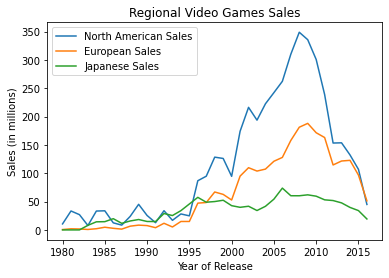

In [39]:
fig, ax = plt.subplots()

dfYear = df.groupby(by = ["Year_of_Release"]).sum()
dfYear = dfYear.reset_index() #Puts year of release back in as a column

dropYears = [2017, 2018, 2019, 2020] #Data is only through December of 2016
dfYear = dfYear[~dfYear["Year_of_Release"].isin(dropYears)] #Keep only the years outside of the drop years

ax.set_ylabel("Sales (in millions)")
ax.set_xlabel("Year of Release")
ax.set_title("Regional Video Games Sales")

ax.plot(dfYear["Year_of_Release"], dfYear["NA_Sales"], label = "North American Sales")
ax.plot(dfYear["Year_of_Release"], dfYear["EU_Sales"], label = "European Sales")
ax.plot(dfYear["Year_of_Release"], dfYear["JP_Sales"], label = "Japanese Sales")

ax.legend()

In [4]:
#Group by Year and Genre, getting sum totals, and filter to 2000-2011

dfCatYear = df.groupby(by = ["Year_of_Release", "Genre"]).sum()
dfCatYear = dfCatYear.reset_index()
dfCatYear.head(5)

dfCatYear2000s = dfCatYear[dfCatYear["Year_of_Release"].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])]
dfCatYear2000s.dtypes
#dfCatYear2000s = pd.to_datetime(dfCatYear2000s["Year_of_Release"])

Year_of_Release    float64
Genre               object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Count         float64
dtype: object

[Text(0.5, 0, '2000'),
 Text(1.5, 0, '2001'),
 Text(2.5, 0, '2002'),
 Text(3.5, 0, '2003'),
 Text(4.5, 0, '2004'),
 Text(5.5, 0, '2005'),
 Text(6.5, 0, '2006'),
 Text(7.5, 0, '2007'),
 Text(8.5, 0, '2008'),
 Text(9.5, 0, '2009'),
 Text(10.5, 0, '2010'),
 Text(11.5, 0, '2011')]

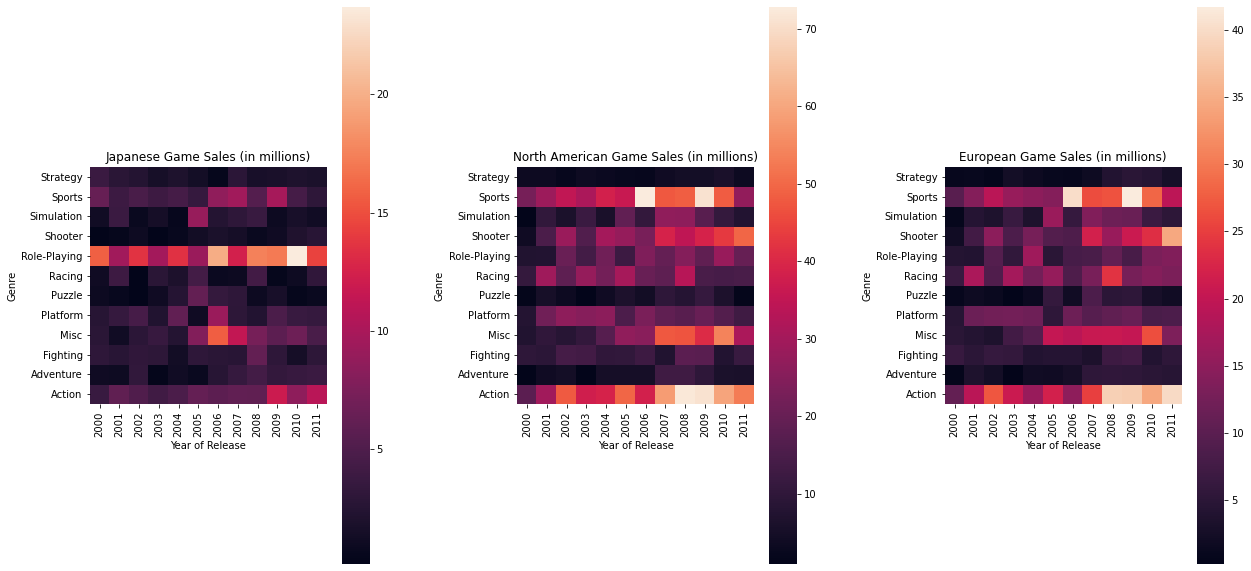

In [6]:
#Create arrays for heatmaps by region, and create heatmaps
arrayJP = dfCatYear2000s.pivot("Genre", "Year_of_Release", "JP_Sales")
arrayNA = dfCatYear2000s.pivot("Genre", "Year_of_Release", "NA_Sales")
arrayEU = dfCatYear2000s.pivot("Genre", "Year_of_Release", "EU_Sales")

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(19.2)
fig.set_figheight(10.8)
fig.tight_layout(pad = 10)

xLabels = []
for i in range(12):
    if i < 10:
        xLabels.append("200" + str(i))
    else:
        xLabels.append("20" + str(i))

ax1 = sns.heatmap(arrayJP, ax=ax[0], square = True)
ax1.invert_yaxis()
ax1.set_title("Japanese Game Sales (in millions)")
ax1.set(xlabel="Year of Release")
ax1.set_xticklabels(xLabels)

ax2 = sns.heatmap(arrayNA, ax=ax[1], square = True)
ax2.invert_yaxis()
ax2.set_title("North American Game Sales (in millions)")
ax2.set(xlabel="Year of Release")
ax2.set_xticklabels(xLabels)

ax3 = sns.heatmap(arrayEU, ax=ax[2], square = True)
ax3.invert_yaxis()
ax3.set_title("European Game Sales (in millions)")
ax3.set(xlabel="Year of Release")
ax3.set_xticklabels(xLabels)